In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/vimu/Documents/Data Science/SDS/Github/TimeSeriesAnalysis/Data/Energy_consumption.csv',index_col= "Timestamp",parse_dates=True)

In [12]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['EnergyConsumption'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -31.576934146718358
p-value: 0.0


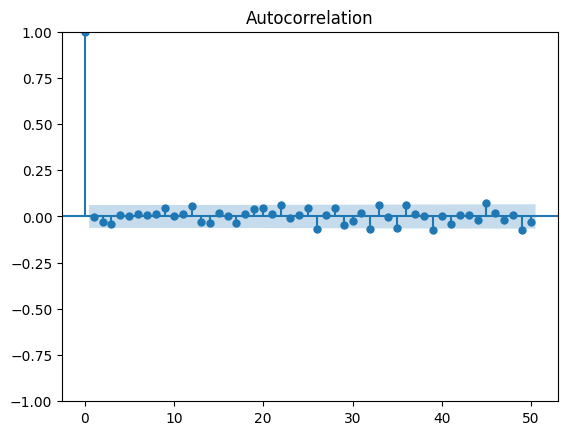

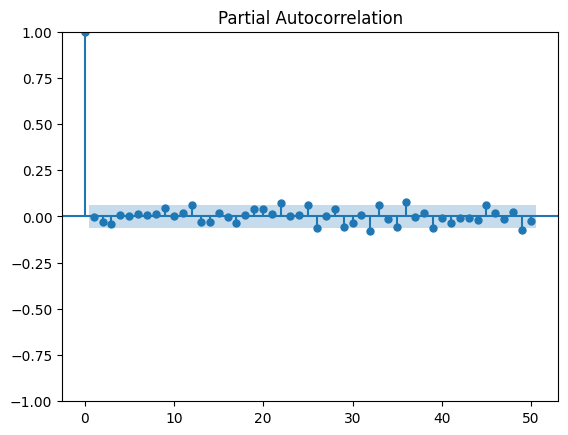

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['EnergyConsumption'].dropna(), lags=50)
plot_pacf(df['EnergyConsumption'].dropna(), lags=50)
plt.show()

RMSE: 6.11


/Users/vimu/Documents/Data Science/SDS/Github/TimeSeriesAnalysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/vimu/Documents/Data Science/SDS/Github/TimeSeriesAnalysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


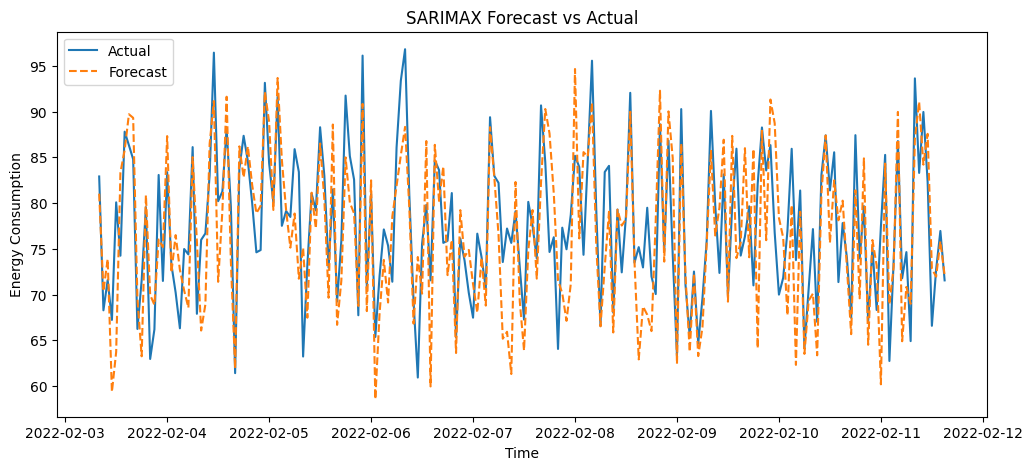

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Target and Exogenous Variables
y = df['EnergyConsumption']
X = df[['Temperature', 'Occupancy']]

# Time-based train-test split (80/20)
split = int(len(df) * 0.8)
y_train, y_test = y[:split], y[split:]
X_train, X_test = X[:split], X[split:]

# Fit SARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0))
results = model.fit(disp=False)

# Forecast
forecast = results.predict(start=len(y_train), end=len(y)-1, exog=X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print(f"RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("SARIMAX Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.show()

In [16]:
import joblib
# Save the model to a file
joblib.dump(results, 'sarimax_model.pkl')
print("Model saved to xgb_model.pkl")

Model saved to xgb_model.pkl
